In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Life Expectancy Data.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [46]:
#Valores nulos eliminados
df.dropna(inplace = True)

#No hay duplicados
duplicados = df.duplicated()
print("\n Identificación de duplicados:")
print(duplicados.unique())



 Identificación de duplicados:
[False]


In [47]:
esperanza = []
i = 0
for e in df["Life expectancy "]:
    if e > 75:
        i = 2
    elif e > 60:
        i = 1
    else:
        i = 0
    esperanza.append(i)

df["esperanza vida"] = esperanza
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,esperanza vida
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0


In [48]:
from sklearn.preprocessing import LabelEncoder

# Crear un codificador
label_encoder = LabelEncoder()

df['país cod'] = label_encoder.fit_transform(df['Country'])
df['status cod'] = label_encoder.fit_transform(df['Status'])  

df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,esperanza vida,país cod,status cod
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,0,1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,0,1
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,0,1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,0,1
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,132,1
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,132,1
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,132,1
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,132,1


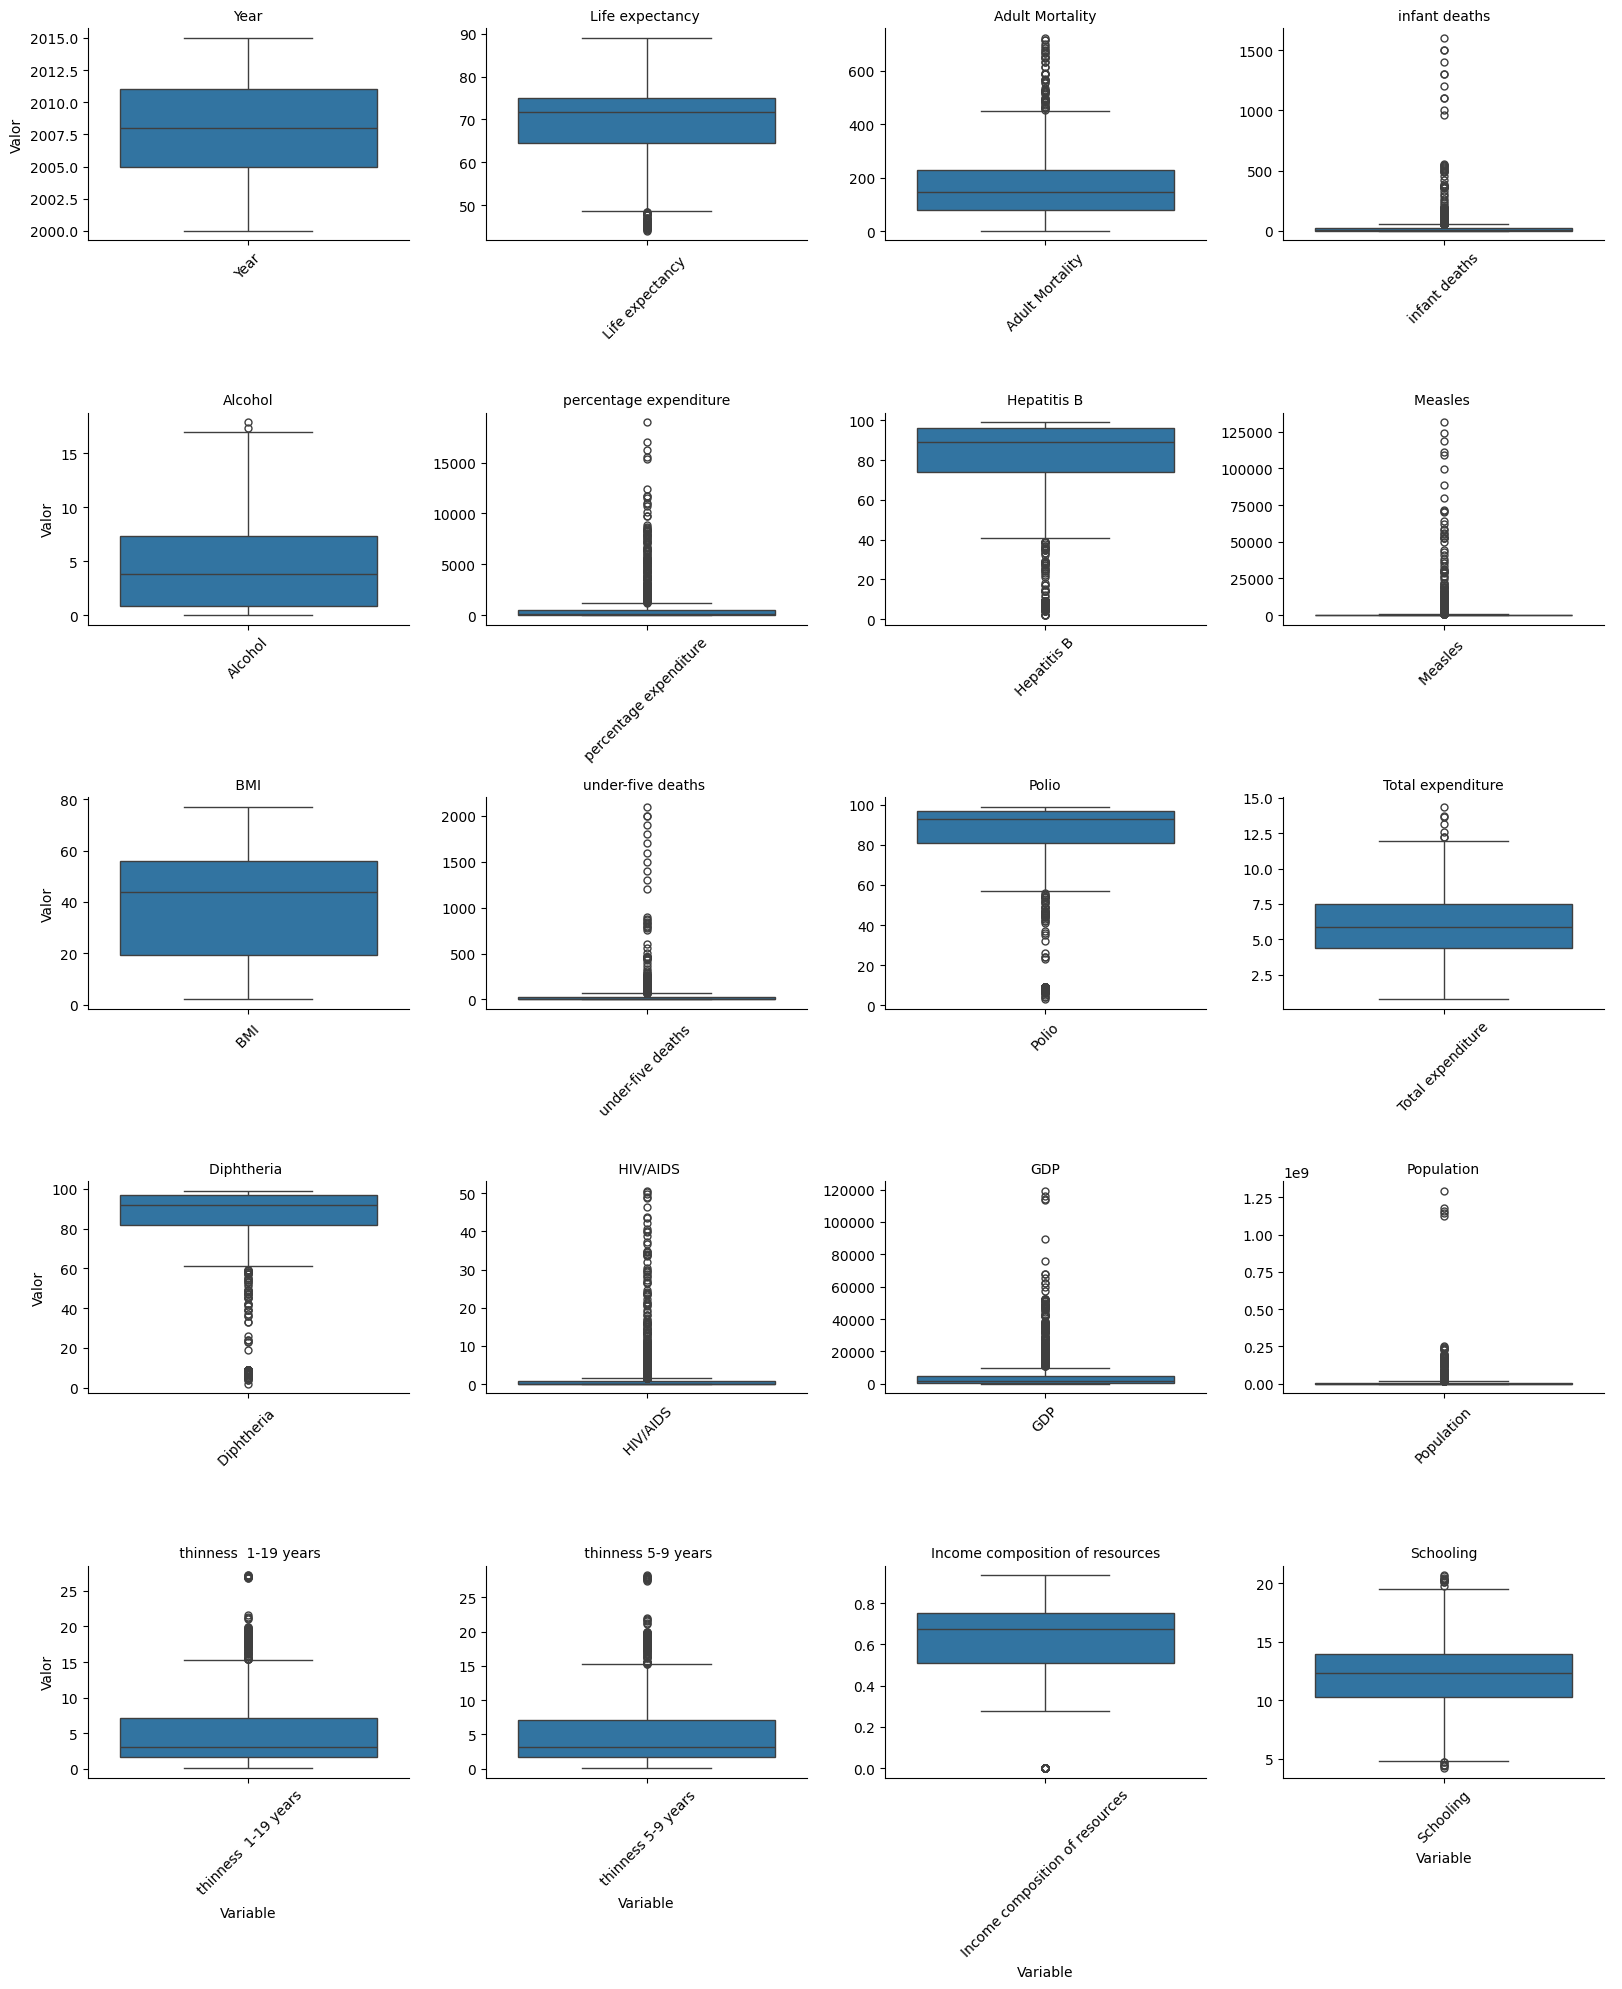

In [73]:
# Lista de columnas numéricas de interés
columnas_numericas = [
    "Year", "Life expectancy ", "Adult Mortality", "infant deaths", "Alcohol",
    "percentage expenditure", "Hepatitis B", "Measles ", " BMI ", "under-five deaths ",
    "Polio", "Total expenditure", "Diphtheria ", " HIV/AIDS", "GDP", "Population",
    " thinness  1-19 years", " thinness 5-9 years", "Income composition of resources", "Schooling"
]

# Seleccionar las columnas deseadas
df_numeric = df[columnas_numericas]

# Convertir el DataFrame a formato largo
df_long = df_numeric.melt(var_name='Variable', value_name='Valor')

# Crear un grid de boxplots con catplot, con 4 columnas por fila
g = sns.catplot(
    data=df_long, 
    x='Variable', 
    y='Valor', 
    kind='box', 
    col='Variable', 
    col_wrap=4, 
    sharex=False, 
    sharey=False, 
    height=4
)

g.set_titles("{col_name}")  # Ajustar títulos de cada subplot
g.set_xticklabels(rotation=45)  # Rotar etiquetas si es necesario
plt.tight_layout()
plt.show()

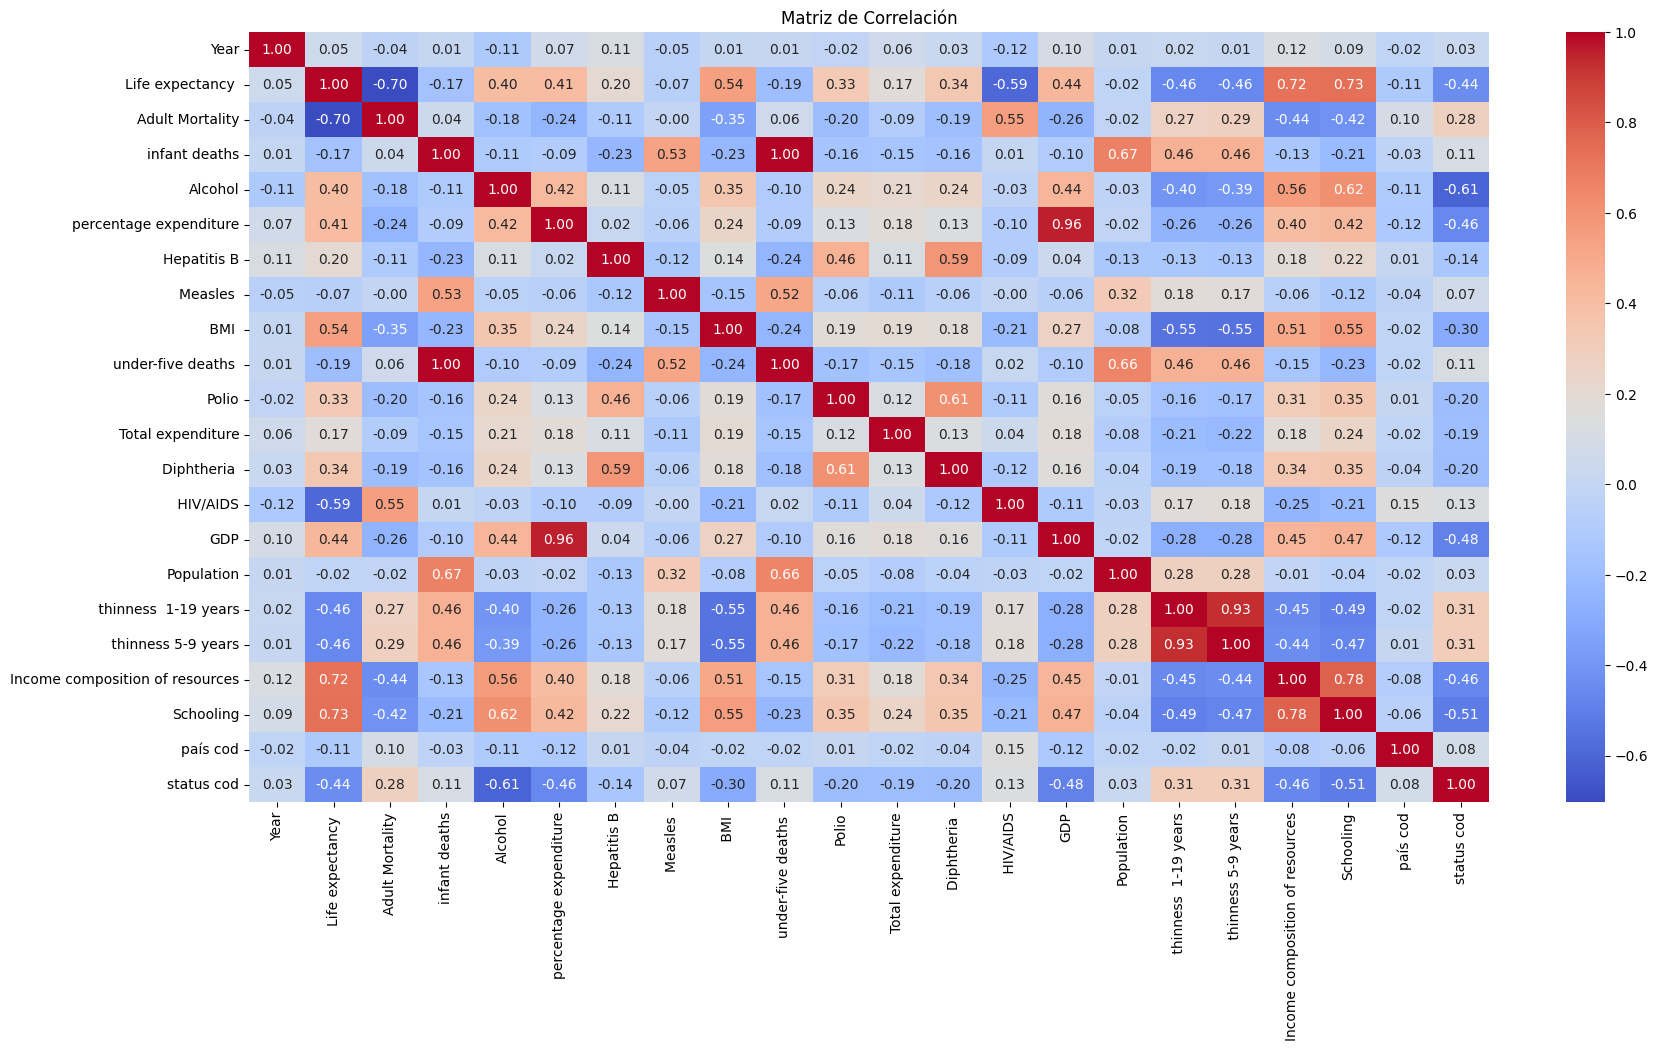

In [57]:
prueba = df.drop(columns = ["esperanza vida", "Country", "Status"])
correlaciones = prueba.corr()

# Configuramos el tamaño de la figura para que se vea bien
plt.figure(figsize=(20,10))

# Creamos un mapa de calor (heatmap) con la matriz de correlación del DataFrame `df`
sns.heatmap(
    correlaciones,        # Calculamos la matriz de correlación
    annot=True,       # Mostramos los valores numéricos dentro de cada celda
    cmap='coolwarm',  # Usamos una paleta de colores que va de azul a rojo
    fmt=".2f"         # Limitamos los valores a 2 decimales
)

# Añadimos un título al gráfico
plt.title("Matriz de Correlación")

# Mostramos la gráfica generada
plt.show()

In [78]:
from sklearn.model_selection import GridSearchCV
X = df.drop(columns = ["esperanza vida", "Country", "Status", " thinness  1-19 years", "GDP", "under-five deaths ", "Life expectancy "])
y = df["esperanza vida"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
parametros = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Valores del parámetro de regularización C
    "solver": ["liblinear", "lbfgs"]      # Algoritmos de optimización para ajustar la regresión logística
}
modelo = LogisticRegression(max_iter=500)

# Configuramos GridSearchCV:
# - modelo: Modelo base a optimizar.
# - parametros: Diccionario con los hiperparámetros a evaluar.
# - cv=5: Validación cruzada con 5 divisiones (folds).
# - scoring="accuracy": Se usará la precisión como métrica para evaluar el mejor modelo.
grid_search = GridSearchCV(modelo, parametros, cv=5, scoring="accuracy")

# Ajustamos GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimimos los mejores hiperparámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Imprimimos la mejor precisión obtenida durante la validación cruzada
print("Mejor Accuracy:", grid_search.best_score_)

Mejores parámetros: {'C': 100, 'solver': 'lbfgs'}
Mejor Accuracy: 0.8717372482589875


              precision    recall  f1-score   support

           0       0.86      0.87      0.87        85
           1       0.84      0.91      0.87       281
           2       0.87      0.71      0.78       129

    accuracy                           0.85       495
   macro avg       0.86      0.83      0.84       495
weighted avg       0.85      0.85      0.85       495



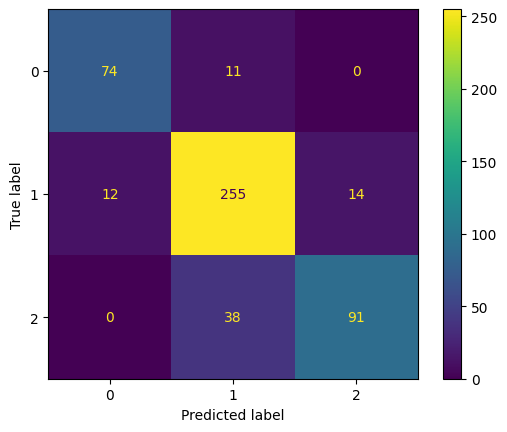

In [79]:
X = df.drop(columns = ["esperanza vida", "Country", "Status", " thinness  1-19 years", "GDP", "under-five deaths ", "Life expectancy "])
y = df["esperanza vida"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Estandarizamos los datos
escaler = StandardScaler()
X_train = escaler.fit_transform(X_train)
X_test = escaler.transform(X_test)

#Crear el modelo de regresión logística multinomial 
model = LogisticRegression(solver='lbfgs', max_iter=500, C = 100) # multinomial es para problemas de clasificación multiclase

# Entrenamos el modelo
model.fit(X_train, y_train)

# Realizamos predicciones
y_pred = model.predict(X_test)

# Mostramos el reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
matrix = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

plt.show()



In [81]:
from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Aumentar clase minoritaria al 50% de la mayor
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

model = LogisticRegression(solver='lbfgs', max_iter=500, C = 100) # multinomial es para problemas de clasificación multiclase

# Entrenamos el modelo
model.fit(X_train, y_train)

# Realizamos predicciones
y_pred = model.predict(X_test)

# Mostramos el reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
matrix = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

plt.show()

ValueError: "sampling_strategy" can be a float only when the type of target is binary. For multi-class, use a dict.

Mejores parámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy en el conjunto de prueba: 0.9010


[Text(0.7935500372023809, 0.9666666666666667, 'Income composition of resources <= 0.787\ngini = 0.564\nsamples = 1154\nvalue = [204, 684, 266]\nclass = Media'),
 Text(0.6644810267857143, 0.9, 'Adult Mortality <= 267.5\ngini = 0.465\nsamples = 948\nvalue = [204, 657, 87]\nclass = Media'),
 Text(0.7290155319940477, 0.9333333333333333, 'True  '),
 Text(0.5134858630952381, 0.8333333333333334, ' HIV/AIDS <= 3.3\ngini = 0.305\nsamples = 748\nvalue = [45, 616, 87]\nclass = Media'),
 Text(0.3986235119047619, 0.7666666666666667, 'Adult Mortality <= 127.5\ngini = 0.26\nsamples = 718\nvalue = [20, 611, 87]\nclass = Media'),
 Text(0.20461309523809523, 0.7, ' thinness 5-9 years <= 2.85\ngini = 0.47\nsamples = 252\nvalue = [11, 168, 73]\nclass = Media'),
 Text(0.0744047619047619, 0.6333333333333333, 'Income composition of resources <= 0.697\ngini = 0.501\nsamples = 107\nvalue = [1.0, 46.0, 60.0]\nclass = Alta'),
 Text(0.023809523809523808, 0.5666666666666667, 'Diphtheria  <= 49.5\ngini = 0.123\nsamp

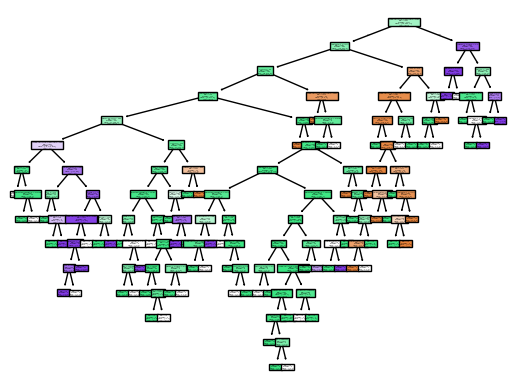

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

df2 = pd.read_csv("Life Expectancy Data.csv")

X = df.drop(columns = ["esperanza vida", "Country", "Status", "Life expectancy "])
y = df["esperanza vida"]

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el clasificador de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Definir el grid de parámetros
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini'],
    'splitter': ['best' , 'random']
}

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo con los parámetros especificados
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print(f"Mejores parámetros: {grid_search.best_params_}")

# Evaluar el modelo en el conjunto de prueba
accuracy = grid_search.score(X_test, y_test)
print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")

# Visualizar el árbol de decisión
tree.plot_tree(grid_search.best_estimator_, filled=True, feature_names=X.columns, class_names=["Baja", "Media", "Alta"])